# NUSA FA 25 Assessment

## Instructions

1. **Dataset Selection**  
   - Identify a dataset containing **historical prices** for:  
     - A **single stock** of your choice.  
     - The **S&P 500 Index** over the same time period.  
   - The dataset **does not need** to include the most recent prices.  
   - Acceptable data sources include:  
     - [Kaggle Datasets](https://www.kaggle.com/datasets)  
     - [Yahoo Finance API](https://github.com/ranaroussi/yfinance)

2. **Tools & Libraries**  
   - Required:  
     - `pandas`  
     - `numpy`  
     - `matplotlib` (or another plotting library of your choice)  
   - Optional:  
     - `statsmodels`  
     - `scipy`  
     - `sklearn`  

3. **Submission Requirements**  
   - Provide **code** with **comments** and/or **markdown cells** that clearly explain your thought process.  
   - Ensure **clarity**, **correctness**, and **clean code** — design your analysis thoughtfully.  

4. **Interview Expectation**  
   - If selected for an interview, you should be prepared to:  
     - Explain your thought process.  
     - Describe the steps you took to analyze the data.  
     - Use of AI is prohibited on this assesment
     - Any code submitted may be reviewed, and candidates will be expected to explain their implementation choices during the interview
    
If you have any questions, please don't hesitate to [reach out](https://www.nusystematicalpha.com/team.html) to any of the leaders.

### Personal Details
##### Name: Duke Diamond
##### Date: 8/27/25
##### Year of Study (e.g. Sophomore): Sophomore
##### Major/Minor: Computer Science, AI Concentration, Minor in Economics
##### Email (that you check often): dukeishosw@gmail.com
##### Phone Number: 860-964-8545
##### GitHub or Personal Website: dukemdiamond.com | https://github.com/dukemdiamond


### Section 1 Data Loading and Cleaning
- Q1: Load in the datasets and parse the data in a way that makes sense for the analysis.
- Q2: Print the summary statistics of each dataset, and the total/annualized return.
- Q3: Plot the cumulative returns for the stock and for the S&P 500 index. Comment briefly on results overtime.

Price         Open   Close Daily_Return
Ticker        REGN    REGN             
Date                                   
2024-08-27 1194.22 1196.63         0.20
2024-08-28 1190.95 1194.17         0.27
2024-08-29 1199.58 1173.90        -2.14
2024-08-30 1174.17 1179.63         0.47
2024-09-03 1173.70 1163.82        -0.84
...            ...     ...          ...
2025-08-21  586.87  598.16         1.92
2025-08-22  602.35  589.48        -2.14
2025-08-25  591.06  572.38        -3.16
2025-08-26  573.00  587.65         2.56
2025-08-27  591.87  586.96        -0.83

[251 rows x 3 columns]
S&P 500 1Y Summary Statistics
Price     Open   Close Daily_Return Cumulative_Return
Ticker   ^GSPC   ^GSPC                               
count   251.00  251.00       251.00            251.00
mean   5903.34 5905.02         0.03              4.96
std     289.30  288.70         1.03              5.13
min    4953.79 4982.77        -4.12            -11.43
25%    5718.61 5710.87        -0.38              1.51
50%    5

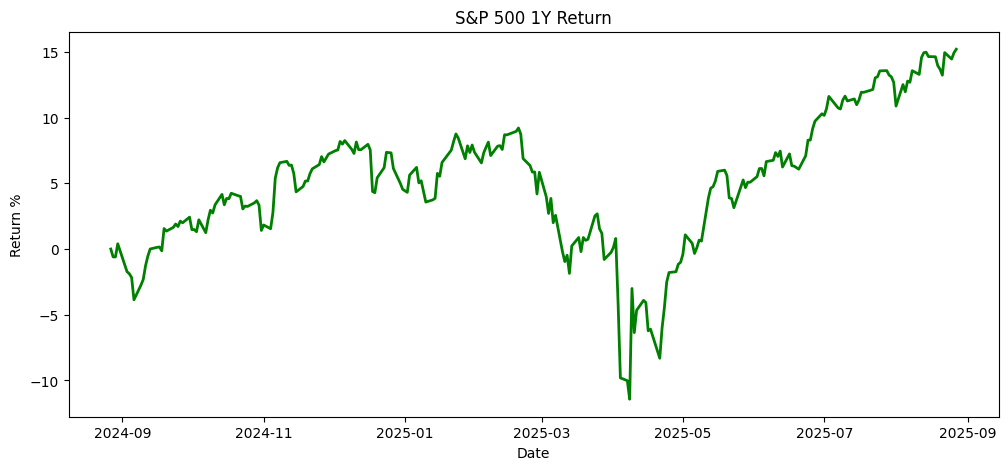

The S&P 500 continues to generate alpha, garnering over 15% returns in the last year. As the market bottomed out, so did the S&P 500 - near -13% during April. Markets are currently at all-time highs, with recent gains hopeful of a rate-cut in September.


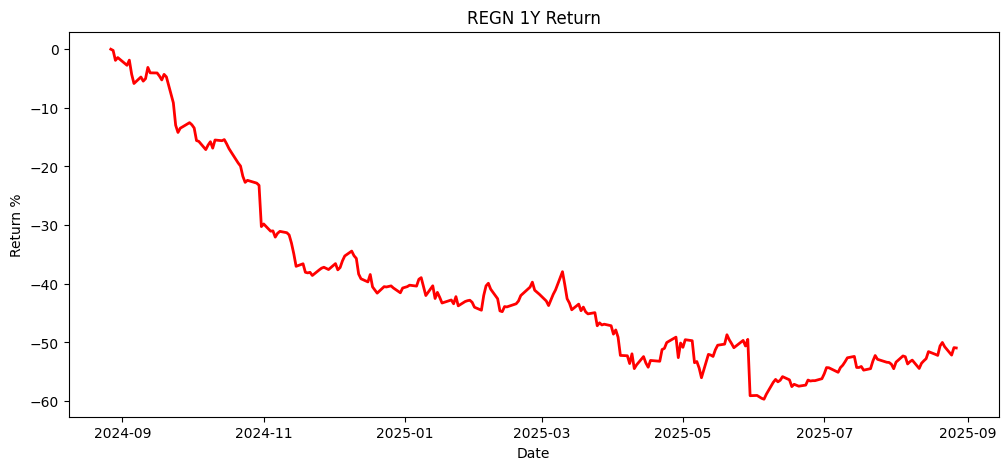

REGN has had a rough year - down nearly 51% over the last 1Y, attributed to patent cliffs, poor financials, and increased competition in the biotech/drug space. 


In [73]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Used to ignore all yFinance 'future update' warnings, etc.
import warnings
warnings.filterwarnings('ignore')

# Set global format to 2 Decimals
pd.options.display.float_format = '{:.2f}'.format

# I'm going to be using REGN as my stock.

# Defining time period (1Y)
start_date = '2024-08-27'
end_date = '2025-08-28'

# Downloading S&P 500 & REGN Open/Close data, using progress=False to ignore loading
market = yf.download('^GSPC', start=start_date, end=end_date, progress=False)[['Open', 'Close']]
regn = yf.download('REGN', start=start_date, end=end_date, progress=False)[['Open', 'Close']]

# Add Daily Return %
market['Daily_Return'] = ((market['Close'] / market['Open'] - 1) * 100)
regn['Daily_Return'] = ((regn['Close'] / regn['Open'] - 1) * 100)
print(regn)

# Calculate cumulative returns
market['Cumulative_Return'] = (market['Close'] / market['Close'].iloc[0] - 1) * 100
regn['Cumulative_Return'] = (regn['Close'] / regn['Close'].iloc[0] - 1) * 100

# Market Summary Statistics
print('S&P 500 1Y Summary Statistics')
print(market.describe())
print(f'Total Return: {market['Cumulative_Return'].iloc[-1]:.2f}%')

# REGN Summary Statistics
print('\nREGN 1Y Summary Statistics')
print(regn.describe())
print(f'Total Return: {regn['Cumulative_Return'].iloc[-1]:.2f}%')




# Market Plot
plt.figure(figsize=(12, 5))
plt.plot(market['Cumulative_Return'], label='S&P 500', color='green', linewidth=2)
plt.title('S&P 500 1Y Return')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.show()

# Comments
print('The S&P 500 continues to generate alpha, garnering over 15% returns in the last year. As the market bottomed out, so did the S&P 500 - near -13% during April. Markets are currently at all-time highs, with recent gains hopeful of a rate-cut in September.')


# REGN Plot
plt.figure(figsize=(12, 5))
plt.plot(regn['Cumulative_Return'], label='REGN', color='red', linewidth=2)
plt.title('REGN 1Y Return')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.show()

# Comments
print('REGN has had a rough year - down nearly 51% over the last 1Y, attributed to patent cliffs, poor financials, and increased competition in the biotech/drug space. ')


### Section 2 Return Analysis and Correlation

- Q4: Calculate the daily excess return of the stock (stock return vs S&P 500 return). Did the stock outperform the index? Plot the excess return over time.
- Q5: Calculate the correlation between the stock and the S&P 500 index. What does this tell you about the relationship between the two?

### Section 3 Linear Regression

##### Q6: Perform a linear regression analysis to determine the relationship between the stock and the S&P 500 index.
##### Q7: Report the regression coefficients (slope and intercept) and the slope in financial terms.
##### Q8: What is the R-squared value of the regression? What does this tell you about the relationship between the two?
##### Q9: Plot the regression line on the scatter plot of the stock returns vs. S&P 500 index returns.
  - Label the axes and title the plot.
  - Display the regression line
  - Include a brief comment on whether the plot supports the regression analysis.